In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
raw_data = pd.read_csv("driver-data.csv",sep=';')

In [3]:
train_data = raw_data.drop(['device_version_hardware','vehicle_model','owner_city','distance','score_average','amount_day','distance_highway','distance_urban','distance_morning','distance_afternoon','distance_night','number_of_hours_moving','distance_dawn'],axis=1)

In [4]:
#train_data.head()

In [5]:
#display(train_data.drop(['trackable_object_id'],axis=1).describe())

In [6]:
indices = [85,183,500,501,600,700,809]

samples = pd.DataFrame(train_data.loc[indices], columns = train_data.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


trackable_object_id  distance_urban_morning  distance_urban_afternoon  \
0               152912                  681.98                    837.90   
1               264964                 1420.78                    476.45   
2               353328                  712.50                    646.02   
3               354004                  716.56                    721.61   
4               389114                 1277.00                    247.96   
5               413015                  930.91                   1407.20   
6               434434                   52.51                     35.38   

   distance_urban_night  distance_urban_dawn  distance_highway_morning  \
0                921.32               168.52                    312.20   
1                 56.37                 0.00                    441.57   
2                580.02                 0.34                    838.70   
3               1320.91               207.86                     35.59   
4               1560.06                 0.45                     65.23   
5                993.69                13.33                    392.93   
6                  4.56                 3.14                    863.56   

   distance_highway_afternoon  distance_highway_night  distance_highway_dawn  \
0                      261.81                  239.70                  22.20   
1                      221.20                    7.95                   0.00   
2                     1038.92                   44.45                   0.00   
3                      282.90                   64.12                  20.42   
4                      124.26                  146.87                   0.00   
5                      600.07                  433.86                   0.00   
6                     1591.98                  393.58                  44.34   

   amount_sudden_acceleration  amount_sudden_braking  amount_sudden_curve  \
0                         369                    997                  436   
1                           9                     43                    4   
2                         200                    313                   81   
3                         542                   1250                  591   
4                         197                    345                  105   
5                         247                   1101                  289   
6                          28                     47                   16   

   distance_weekend  distance_workweek  
0           1880.24            1565.39  
1            653.96            1970.35  
2            840.16            3020.80  
3           1041.07            2328.88  
4            642.16            2779.67  
5           1165.77            3606.20  
6            799.30            2189.74

In [7]:
# look at percentile ranks
pcts = 100. * train_data.rank(axis=0, pct=True).iloc[indices].round(decimals=3)
display(pcts.drop(['trackable_object_id'],axis=1))

distance_urban_morning  distance_urban_afternoon  distance_urban_night  \
85                     49.7                      54.3                  72.0   
183                    85.1                      24.6                   4.0   
500                    52.1                      39.2                  49.0   
501                    52.4                      45.9                  86.6   
600                    81.1                       7.9                  91.0   
700                    66.7                      81.7                  75.5   
809                     1.3                       0.4                   0.6   

     distance_urban_dawn  distance_highway_morning  \
85                  85.3                      53.4   
183                  8.7                      63.2   
500                 17.7                      80.9   
501                 88.2                      15.8   
600                 18.0                      21.9   
700                 35.3                      59.8   
809                 22.5                      81.8   

     distance_highway_afternoon  distance_highway_night  \
85                         42.1                    55.3   
183                        37.8                     9.8   
500                        84.2                    22.1   
501                        44.3                    26.9   
600                        25.4                    42.7   
700                        68.0                    71.2   
809                        93.0                    68.6   

     distance_highway_dawn  amount_sudden_acceleration  amount_sudden_braking  \
85                    67.1                        79.7                   87.7   
183                   19.4                         5.3                    7.3   
500                   19.4                        61.0                   51.2   
501                   66.2                        87.8                   92.1   
600                   19.4                        60.5                   54.8   
700                   19.4                        67.6                   89.6   
809                   75.3                        12.9                    7.8   

     amount_sudden_curve  distance_weekend  distance_workweek  
85                  92.7              84.6               28.3  
183                  4.9              30.5               38.7  
500                 50.0              42.2               62.5  
501                 95.9              54.0               47.9  
600                 58.4              29.8               57.8  
700                 86.4              61.2               71.8  
809                 13.9              39.7               44.4

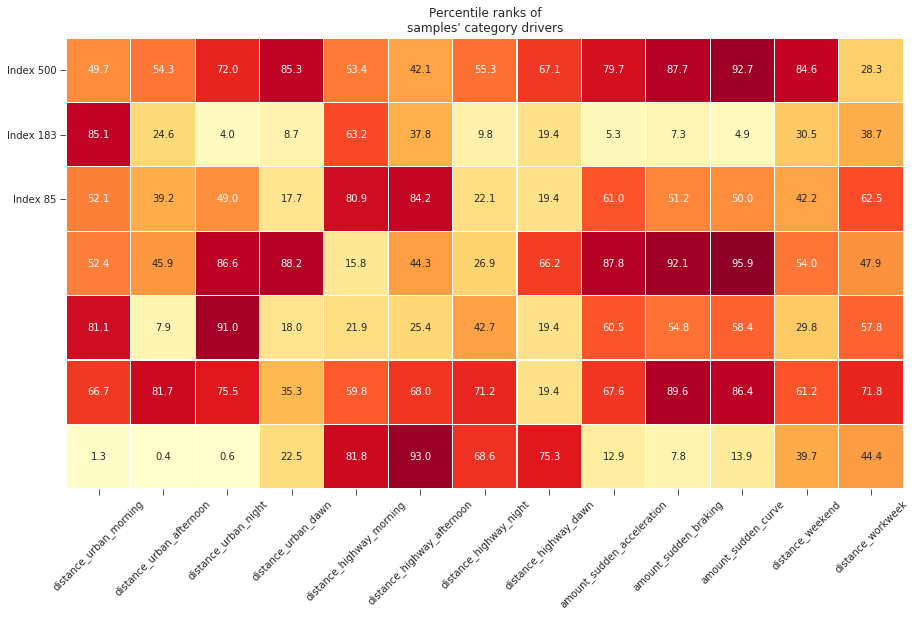

In [8]:
# plot
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(15, 10.27)

# visualize percentiles with heatmap
sns.heatmap(pcts.drop(['trackable_object_id'],axis=1), annot=True, linewidth=.1, vmax=99, fmt='.1f', cmap='YlOrRd', square=True, cbar=False)
plt.yticks([2.5,1.5,.5], ['Index '+str(x) for x in indices], rotation='horizontal')
plt.xticks(rotation=45, ha='center')
plt.title('Percentile ranks of\nsamples\' category drivers');

In [9]:
normalizer = StandardScaler()
data_array = normalizer.fit_transform(train_data.drop(['trackable_object_id'],axis=1))
data_norm = pd.DataFrame(data_array,columns = train_data.drop(['trackable_object_id'],axis=1).columns).set_index(train_data.index) 

samples_array = normalizer.fit_transform(samples.drop(['trackable_object_id'],axis=1))
samples_norm = pd.DataFrame(samples_array,columns = samples.drop(['trackable_object_id'],axis=1).columns).set_index(samples.index) 

In [10]:
samples_norm.head()

distance_urban_morning  distance_urban_afternoon  distance_urban_night  \
0               -0.349624                  0.519665              0.262068   
1                1.425860                 -0.361128             -1.305367   
2               -0.276279                  0.052086             -0.356425   
3               -0.266522                  0.236286              0.986193   
4                1.080328                 -0.917921              1.419573   

   distance_urban_dawn  distance_highway_morning  distance_highway_afternoon  \
0             1.333169                 -0.356028                   -0.651890   
1            -0.667670                  0.065772                   -0.732867   
2            -0.663633                  1.360582                    0.897675   
3             1.800253                 -1.257893                   -0.609837   
4            -0.662327                 -1.161254                   -0.926166   

   distance_highway_night  distance_highway_dawn  amount_sudden_acceleration  \
0                0.313480               0.610465                    0.820216   
1               -1.150499              -0.775658                   -1.265500   
2               -0.919926              -0.775658                   -0.158912   
3               -0.795670               0.499326                    1.822518   
4               -0.272933              -0.775658                   -0.176293   

   amount_sudden_braking  amount_sudden_curve  distance_weekend  \
0               0.863347             1.038917          2.194921   
1              -1.136456            -1.014472         -0.874154   
2              -0.570474            -0.648474         -0.408142   
3               1.393693             1.775665          0.094686   
4              -0.503395            -0.534397         -0.903687   

   distance_workweek  
0          -1.455371  
1          -0.820990  
2           0.824568  
3          -0.259343  
4           0.446832

In [11]:
data_norm.head()

distance_urban_morning  distance_urban_afternoon  distance_urban_night  \
0               -0.795872                 -0.284195              0.514711   
1               -0.336532                  0.219600              0.601193   
2               -0.315894                 -0.614308             -0.484335   
3                0.057102                 -0.205652              0.099657   
4                0.889310                 -0.393106              0.540081   

   distance_urban_dawn  distance_highway_morning  distance_highway_afternoon  \
0            -0.315656                  0.091197                    0.856960   
1             0.087554                 -0.616783                   -0.467165   
2            -0.348311                 -0.633822                   -0.350119   
3            -0.226900                 -0.599306                   -0.277413   
4            -0.287483                 -0.494284                   -0.743076   

   distance_highway_night  distance_highway_dawn  amount_sudden_acceleration  \
0                1.674929              -0.371234                   -0.030824   
1               -0.325468              -0.236815                    0.657039   
2               -0.650982              -0.391371                   -0.287527   
3               -0.112619               0.675851                   -0.494384   
4               -0.502095              -0.381446                    0.019021   

   amount_sudden_braking  amount_sudden_curve  distance_weekend  \
0              -0.384332            -0.196910          1.317109   
1              -0.223805             0.532507         -0.422665   
2              -0.571067            -0.359865         -1.223298   
3              -0.574343            -0.045595         -0.061587   
4              -0.440025             0.113480         -0.232282   

   distance_workweek  
0          -0.141644  
1          -0.048317  
2          -0.446551  
3          -0.250135  
4          -0.089538

In [12]:
#pd.plotting.scatter_matrix(data_norm, alpha = 0.3, figsize = (18,12), diagonal = 'kde');

In [13]:
all_outliers = np.array([], dtype='int64')

# Para cada atributo encontre os pontos de dados com máximos valores altos e baixos
for feature in data_norm.keys():
    
    # Calcule Q1 (25º percentil dos dados) para o atributo dado
    Q1 =  np.percentile(data_norm[feature],25)
    
    # Calcule Q3 (75º percentil dos dados) para o atributo dado
    Q3 =  np.percentile(data_norm[feature],75)
    
    # Utilize a amplitude interquartil para calcular o passo do discrepante (1,5 vezes a variação interquartil)
    step = 1.5 * (Q3-Q1)
    
    # Display the outliers
    #print("Data points considered outliers for the feature '{}':".format(feature))
    outlier_points = data_norm[~((data_norm[feature] >= Q1 - step) & (data_norm[feature] <= Q3 + step))]
    
    all_outliers = np.append(all_outliers, outlier_points.index.values.astype('int64'))
    
    # Display the outliers
    #display(outlier_points)
    

all_outliers, indices = np.unique(all_outliers, return_inverse=True)
counts = np.bincount(indices)
outliers = all_outliers[counts>1]

# Remova os discrepantes, caso nenhum tenha sido especificado
good_data = data_norm.drop(outliers).reset_index(drop = True)

In [14]:
print(len(outliers))

2832


In [15]:
display(outliers)

array([   11,    18,    32, ..., 13295, 13309, 13321])

Dimension 1    0.3789
Dimension 2    0.5422
Dimension 3    0.6436
Dimension 4    0.7317
Dimension 5    0.7820
Dimension 6    0.8283
Name: Explained Variance, dtype: float64


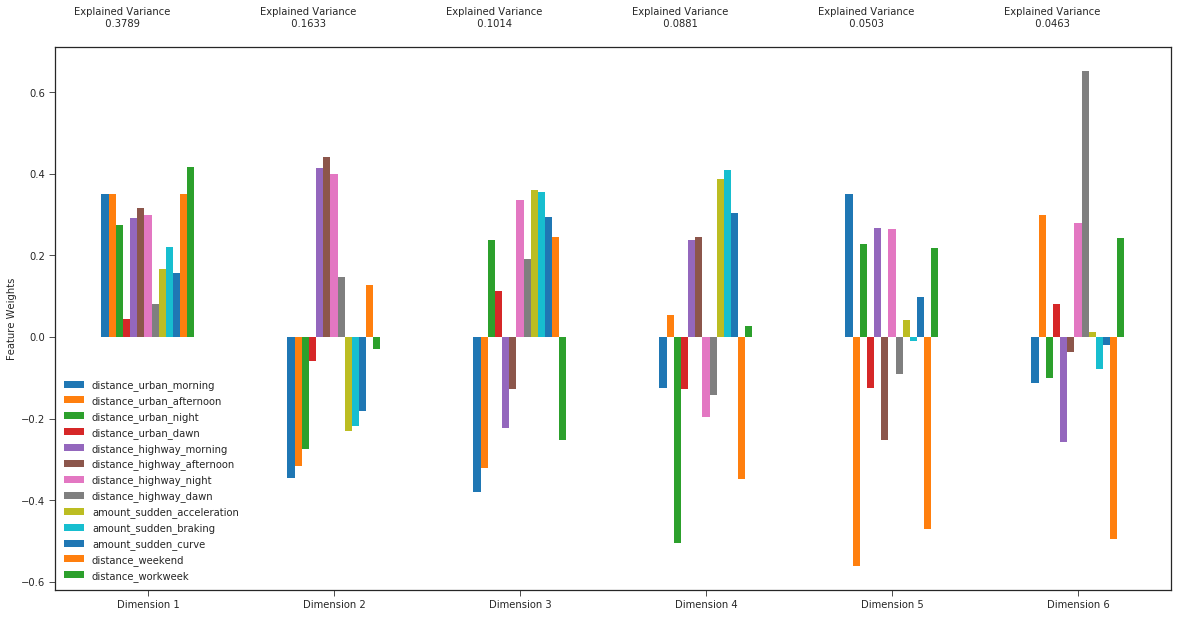

In [16]:
from sklearn.decomposition import PCA
import renders as rs


# Aplique a PCA ao ajustar os bons dados com o mesmo número de dimensões como atributos
pca = PCA(n_components=6).fit(good_data) 

# Transforme a amostra de data-log utilizando o ajuste da PCA acima
pca_samples = pca.transform(samples_norm)

# Gere o plot dos resultados da PCA
pca_results = rs.pca_results(good_data, pca)

# display cumulative variance:
print(pca_results['Explained Variance'].cumsum())

In [17]:
display(pca_results)

Explained Variance  distance_urban_morning  \
Dimension 1              0.3789                  0.3500   
Dimension 2              0.1633                 -0.3465   
Dimension 3              0.1014                 -0.3803   
Dimension 4              0.0881                 -0.1243   
Dimension 5              0.0503                  0.3517   
Dimension 6              0.0463                 -0.1121   

             distance_urban_afternoon  distance_urban_night  \
Dimension 1                    0.3508                0.2741   
Dimension 2                   -0.3160               -0.2739   
Dimension 3                   -0.3205                0.2380   
Dimension 4                    0.0551               -0.5060   
Dimension 5                   -0.5608                0.2288   
Dimension 6                    0.2986               -0.1015   

             distance_urban_dawn  distance_highway_morning  \
Dimension 1               0.0444                    0.2916   
Dimension 2              -0.0579                    0.4149   
Dimension 3               0.1132                   -0.2224   
Dimension 4              -0.1286                    0.2374   
Dimension 5              -0.1249                    0.2673   
Dimension 6               0.0817                   -0.2587   

             distance_highway_afternoon  distance_highway_night  \
Dimension 1                      0.3153                  0.2988   
Dimension 2                      0.4425                  0.4009   
Dimension 3                     -0.1281                  0.3351   
Dimension 4                      0.2461                 -0.1954   
Dimension 5                     -0.2524                  0.2650   
Dimension 6                     -0.0359                  0.2795   

             distance_highway_dawn  amount_sudden_acceleration  \
Dimension 1                 0.0807                      0.1662   
Dimension 2                 0.1481                     -0.2317   
Dimension 3                 0.1918                      0.3605   
Dimension 4                -0.1416                      0.3886   
Dimension 5                -0.0900                      0.0416   
Dimension 6                 0.6515                      0.0127   

             amount_sudden_braking  amount_sudden_curve  distance_weekend  \
Dimension 1                 0.2203               0.1564            0.3506   
Dimension 2                -0.2181              -0.1804            0.1281   
Dimension 3                 0.3566               0.2936            0.2460   
Dimension 4                 0.4103               0.3031           -0.3491   
Dimension 5                -0.0105               0.0989           -0.4701   
Dimension 6                -0.0794              -0.0195           -0.4946   

             distance_workweek  
Dimension 1             0.4166  
Dimension 2            -0.0303  
Dimension 3            -0.2538  
Dimension 4             0.0280  
Dimension 5             0.2184  
Dimension 6             0.2428

In [18]:
# display cumulative variance:
print("PCA dimensions 1 e 2 cumulative sums: ", pca_results['Explained Variance'].cumsum()[1])
print("PCA dimensions 1,2,3,4 e 5 cumulative sums: ", pca_results['Explained Variance'].cumsum()[5])

PCA dimensions 1 e 2 cumulative sums:  0.5422
PCA dimensions 1,2,3,4 e 5 cumulative sums:  0.8283


In [19]:
# Aplique o PCA ao ajusta os bons dados com apenas duas dimensões
pca = PCA(n_components=5)
pca.fit(good_data) 

# Transforme os bons dados utilizando o ajuste do PCA acima
reduced_data = pca.transform(good_data)

# Transforme a amostra de log-data utilizando o ajuste de PCA acima
pca_samples = pca.transform(samples_norm)

# Crie o DataFrame para os dados reduzidos
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2','Dimension 3','Dimension 4','Dimension 5'])

Explained Variance  distance_urban_morning  \
Dimension 1              0.3789                  0.3500   
Dimension 2              0.1633                 -0.3465   
Dimension 3              0.1014                 -0.3803   
Dimension 4              0.0881                 -0.1243   
Dimension 5              0.0503                  0.3517   

             distance_urban_afternoon  distance_urban_night  \
Dimension 1                    0.3508                0.2741   
Dimension 2                   -0.3160               -0.2739   
Dimension 3                   -0.3205                0.2380   
Dimension 4                    0.0551               -0.5060   
Dimension 5                   -0.5608                0.2288   

             distance_urban_dawn  distance_highway_morning  \
Dimension 1               0.0444                    0.2916   
Dimension 2              -0.0579                    0.4149   
Dimension 3               0.1132                   -0.2224   
Dimension 4              -0.1286                    0.2374   
Dimension 5              -0.1249                    0.2673   

             distance_highway_afternoon  distance_highway_night  \
Dimension 1                      0.3153                  0.2988   
Dimension 2                      0.4425                  0.4009   
Dimension 3                     -0.1281                  0.3351   
Dimension 4                      0.2461                 -0.1954   
Dimension 5                     -0.2524                  0.2650   

             distance_highway_dawn  amount_sudden_acceleration  \
Dimension 1                 0.0807                      0.1662   
Dimension 2                 0.1481                     -0.2317   
Dimension 3                 0.1918                      0.3605   
Dimension 4                -0.1416                      0.3886   
Dimension 5                -0.0900                      0.0416   

             amount_sudden_braking  amount_sudden_curve  distance_weekend  \
Dimension 1                 0.2203               0.1564            0.3506   
Dimension 2                -0.2181              -0.1804            0.1281   
Dimension 3                 0.3566               0.2936            0.2460   
Dimension 4                 0.4103               0.3031           -0.3491   
Dimension 5                -0.0105               0.0989           -0.4701   

             distance_workweek  
Dimension 1             0.4166  
Dimension 2            -0.0303  
Dimension 3            -0.2538  
Dimension 4             0.0280  
Dimension 5             0.2184

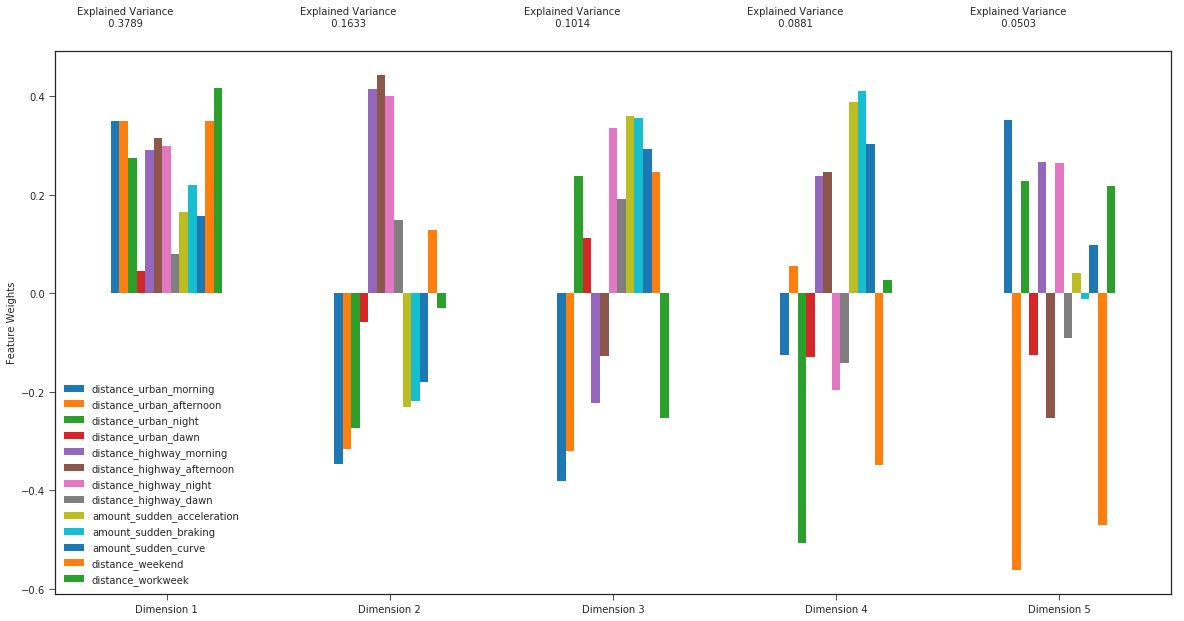

In [20]:
rs.pca_results(good_data, pca)

In [21]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for k in range(2,3):
    
    #Aplique o algoritmo de clustering de sua escolha aos dados reduzidos 
    clusterer =  KMeans(n_clusters=k, random_state=0,n_jobs=-1).fit(reduced_data)

    #Preveja o cluster para cada ponto de dado
    preds = clusterer.predict(reduced_data)
 
    #Ache os centros do cluster
    centers = clusterer.cluster_centers_ 

    #Preveja o cluster para cada amostra de pontos de dado transformados
    sample_preds = clusterer.predict(pca_samples)

    #Calcule a média do coeficiente de silhueta para o número de clusters escolhidos
    score = silhouette_score(reduced_data,preds)
    
    print("({}) clusters : score {:.3f}".format(k,score))

(2) clusters : score 0.314


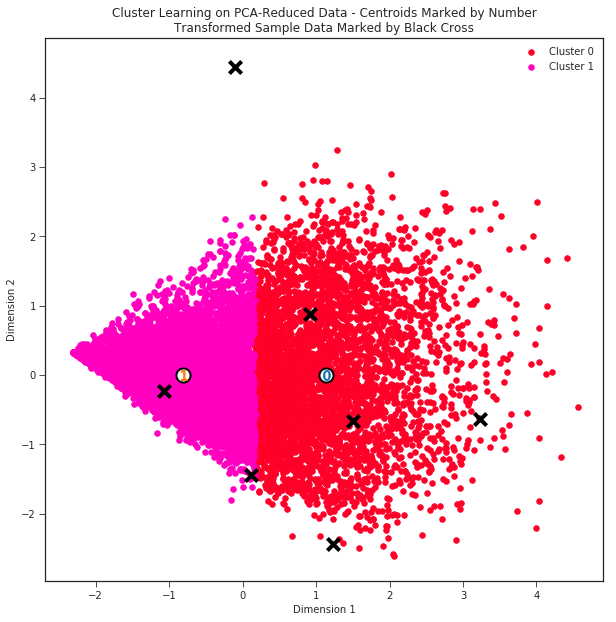

In [22]:
# Mostre os resultados do clustering da implementação
rs.cluster_results(reduced_data, preds, centers, pca_samples)

In [23]:
# Transforme inversamento os centros
log_centers = pca.inverse_transform(centers)

# Exponencie os centros
true_centers = normalizer.inverse_transform(log_centers)

# Mostre os verdadeiros centros
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = good_data.keys())
true_centers.index = segments
display(true_centers)

# Displays difference from the true centers of the clusters to averages of the data
print("True Centers of each segment versus the Mean of the data")
display(true_centers - good_data.mean().round())
print("True Centers of each segment versus the Median of the data")
display(true_centers - good_data.median().round())

distance_urban_morning  distance_urban_afternoon  \
Segment 0                   899.0                     681.0   
Segment 1                   618.0                     407.0   

           distance_urban_night  distance_urban_dawn  \
Segment 0                 825.0                 45.0   
Segment 1                 524.0                 37.0   

           distance_highway_morning  distance_highway_afternoon  \
Segment 0                     451.0                       648.0   
Segment 1                     278.0                       343.0   

           distance_highway_night  distance_highway_dawn  \
Segment 0                   206.0                   10.0   
Segment 1                   112.0                    8.0   

           amount_sudden_acceleration  amount_sudden_braking  \
Segment 0                       223.0                  584.0   
Segment 1                       168.0                  380.0   

           amount_sudden_curve  distance_weekend  distance_workweek  
Segment 0                211.0            1051.0             2582.0  
Segment 1                147.0             776.0             2067.0

True Centers of each segment versus the Mean of the data


distance_urban_morning  distance_urban_afternoon  \
Segment 0                   899.0                     681.0   
Segment 1                   618.0                     407.0   

           distance_urban_night  distance_urban_dawn  \
Segment 0                 825.0                 45.0   
Segment 1                 524.0                 37.0   

           distance_highway_morning  distance_highway_afternoon  \
Segment 0                     451.0                       648.0   
Segment 1                     278.0                       343.0   

           distance_highway_night  distance_highway_dawn  \
Segment 0                   206.0                   10.0   
Segment 1                   112.0                    8.0   

           amount_sudden_acceleration  amount_sudden_braking  \
Segment 0                       223.0                  584.0   
Segment 1                       168.0                  380.0   

           amount_sudden_curve  distance_weekend  distance_workweek  
Segment 0                211.0            1051.0             2582.0  
Segment 1                147.0             776.0             2067.0

True Centers of each segment versus the Median of the data


distance_urban_morning  distance_urban_afternoon  \
Segment 0                   899.0                     681.0   
Segment 1                   618.0                     407.0   

           distance_urban_night  distance_urban_dawn  \
Segment 0                 825.0                 45.0   
Segment 1                 524.0                 37.0   

           distance_highway_morning  distance_highway_afternoon  \
Segment 0                     451.0                       648.0   
Segment 1                     278.0                       343.0   

           distance_highway_night  distance_highway_dawn  \
Segment 0                   206.0                   10.0   
Segment 1                   112.0                    8.0   

           amount_sudden_acceleration  amount_sudden_braking  \
Segment 0                       223.0                  584.0   
Segment 1                       168.0                  380.0   

           amount_sudden_curve  distance_weekend  distance_workweek  
Segment 0                211.0            1051.0             2582.0  
Segment 1                147.0             776.0             2067.0

Sample point 0 predicted to be in Cluster 0 (475.27%)
Sample point 1 predicted to be in Cluster 1 (532.13%)
Sample point 2 predicted to be in Cluster 0 (150.44%)
Sample point 3 predicted to be in Cluster 0 (525.66%)
Sample point 4 predicted to be in Cluster 1 (397.32%)
Sample point 5 predicted to be in Cluster 0 (385.66%)
Sample point 6 predicted to be in Cluster 1 (632.17%)


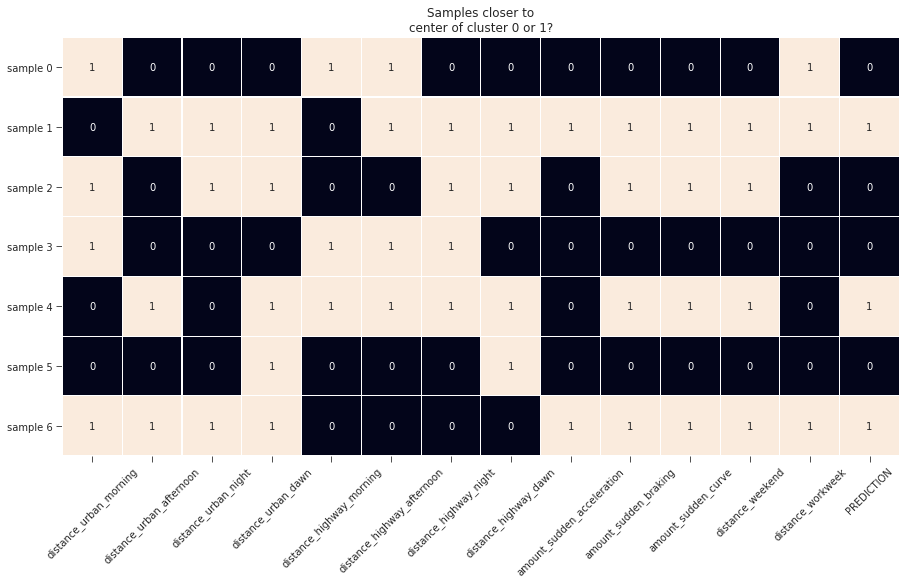

In [32]:
# Display the predictions
samples_proba = clusterer.fit_transform(pca_samples)

# Show the predicted
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster {} ({:.2f}%)".format(pred, samples_proba[i][pred]*100))
    
# check if samples' spending closer to segment 0 or 1
df_diffs = (np.abs(samples.drop(['trackable_object_id'],axis=1)-true_centers.iloc[0]) < np.abs(samples.drop(['trackable_object_id'],axis=1)-true_centers.iloc[1])).applymap(lambda x: 0 if x else 1)

# see how cluster predictions align with similariy of spending in each category
df_preds = pd.concat([df_diffs, pd.Series(sample_preds, name='PREDICTION')], axis=1)


fig, ax = plt.subplots(figsize=(15,8))# Sample figsize in inches

sns.heatmap(df_preds, annot=True, cbar=False, yticklabels=['sample 0', 'sample 1', 'sample 2','sample 3','sample 4','sample 5','sample 6'], linewidth=.1, square=True,ax=ax)
plt.title('Samples closer to\ncenter of cluster 0 or 1?')
plt.xticks(rotation=45, ha='center')
plt.yticks(rotation=0);

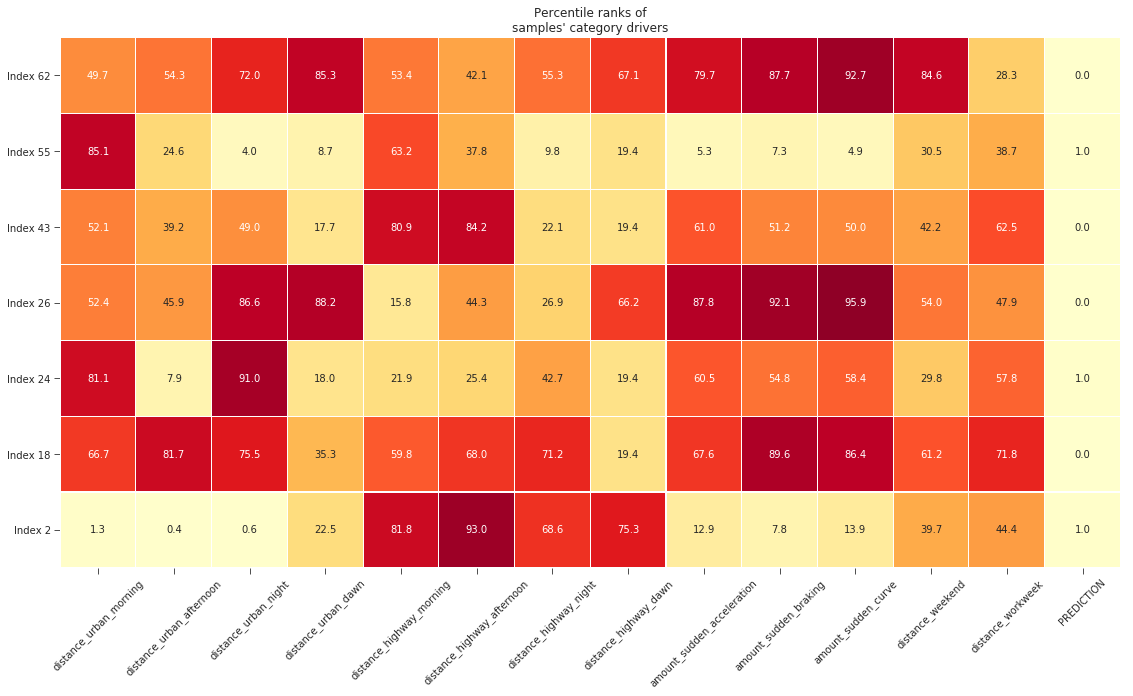

In [79]:
# plot
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(19, 15.27)
prd = pd.Series(sample_preds, name='PREDICTION',index=[85,183,500,501,600,700,809])
df_predict = pd.concat([pcts.drop(['trackable_object_id'],axis=1), prd], axis=1)
sns.heatmap(df_predict, annot=True, cbar=False, linewidth=.1, square=True,vmax=99,fmt='.1f',cmap='YlOrRd')

# visualize percentiles with heatmap
#sns.heatmap(df_predict, annot=True, linewidth=.1, vmax=99, fmt='.1f', cmap='YlOrRd', square=True, cbar=False)
plt.yticks([6.5,5.5,4.5,3.5,2.5,1.5,.5], ['Index '+str(x) for x in indices], rotation='horizontal')
plt.xticks(rotation=45, ha='center')
plt.title('Percentile ranks of\nsamples\' category drivers');

In [26]:
display(samples)

trackable_object_id  distance_urban_morning  distance_urban_afternoon  \
0               152912                  681.98                    837.90   
1               264964                 1420.78                    476.45   
2               353328                  712.50                    646.02   
3               354004                  716.56                    721.61   
4               389114                 1277.00                    247.96   
5               413015                  930.91                   1407.20   
6               434434                   52.51                     35.38   

   distance_urban_night  distance_urban_dawn  distance_highway_morning  \
0                921.32               168.52                    312.20   
1                 56.37                 0.00                    441.57   
2                580.02                 0.34                    838.70   
3               1320.91               207.86                     35.59   
4               1560.06                 0.45                     65.23   
5                993.69                13.33                    392.93   
6                  4.56                 3.14                    863.56   

   distance_highway_afternoon  distance_highway_night  distance_highway_dawn  \
0                      261.81                  239.70                  22.20   
1                      221.20                    7.95                   0.00   
2                     1038.92                   44.45                   0.00   
3                      282.90                   64.12                  20.42   
4                      124.26                  146.87                   0.00   
5                      600.07                  433.86                   0.00   
6                     1591.98                  393.58                  44.34   

   amount_sudden_acceleration  amount_sudden_braking  amount_sudden_curve  \
0                         369                    997                  436   
1                           9                     43                    4   
2                         200                    313                   81   
3                         542                   1250                  591   
4                         197                    345                  105   
5                         247                   1101                  289   
6                          28                     47                   16   

   distance_weekend  distance_workweek  
0           1880.24            1565.39  
1            653.96            1970.35  
2            840.16            3020.80  
3           1041.07            2328.88  
4            642.16            2779.67  
5           1165.77            3606.20  
6            799.30            2189.74